<a href="https://colab.research.google.com/github/LisaStrsh/ProcessMining/blob/main/ProcessMining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv('Detail_Incident_Activity.csv', sep=';')

In [ ]:
df.head()

,Incident ID,DateStamp,IncidentActivity_Type,Assignment Group
0,IM0000004,07.01.2013 08:17,Reassignment,TEAM0001
1,IM0000004,04.11.2013 13:41,Reassignment,TEAM0002
2,IM0000004,04.11.2013 13:41,Update from customer,TEAM0002
3,IM0000004,04.11.2013 12:09,Operator Update,TEAM0003
4,IM0000004,04.11.2013 12:09,Assignment,TEAM0003


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466737 entries, 0 to 466736
Data columns (total 4 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   Incident ID            466737 non-null  object
 1   DateStamp              466737 non-null  object
 2   IncidentActivity_Type  466737 non-null  object
 3   Assignment Group       466737 non-null  object
dtypes: object(4)
memory usage: 14.2+ MB


In [ ]:
# меняем тип данных столбца
df['DateStamp'] = pd.to_datetime(df['DateStamp'], format='%d.%m.%Y %H:%M')


In [ ]:
# меняем имена столбцов
df.rename(columns={'Incident ID' : 'CASE_ID',
                   'DateStamp' : 'EVENT_TIME',
                   'IncidentActivity_Type' : 'EVENT_NAME',
                   'Assignment Group' : 'EVENT_USER'}, inplace=True)

# делаем сортировку
df = df.sort_values(['CASE_ID', 'EVENT_TIME', 'EVENT_NAME']).reset_index(drop=True)

In [ ]:
events = df.copy()

In [ ]:
# считаем базовые метрики:
# 1. количество появления события в данных
# 2. количество кейсов, в которых встречается событие
# 3. количество пользователей, исполнявших событие
event_stat = events.groupby('EVENT_NAME', as_index=False).agg({'CASE_ID' : ['count', 'nunique'],
                                                               'EVENT_USER' : 'nunique'})
event_stat

EVENT_NAME CASE_ID         EVENT_USER
                                   count nunique    nunique
0             Affected CI Change     185     185          1
1              Analysis/Research     981     681         91
2                     Assignment   88502   38677        221
3               Callback Request      53      53          6
4                   Caused By CI   34382   34163        190
5                         Closed   50145   46167        196
6    Communication with customer    6148    4184        121
7      Communication with vendor    1777    1089         73
8                 Contact Change      32      31          1
9             Description Update    4501    3853        132
10                       Dial-in       2       2          2
11    External Vendor Assignment    4354    3891        105
12  External Vendor Reassignment      43      42          9
13               External update    1099     541          1
14                 Impact Change    1283    1171        116
15         Incident reproduction      23      22         12
16              Mail to Customer    3788    3642         41
17              Notify By Change     281     248          1
18                   OO Response      33      28          8
19                          Open   46607   46595         51
20               Operator Update   56292   21333        207
21                Pending vendor    4338    3169         62
22               Problem Closure      40      36          1
23            Problem Workaround     140     124          1
24             Quality Indicator    2465    2404         40
25       Quality Indicator Fixed    7791    7056         87
26         Quality Indicator Set    1956    1896         59
27                  Reassignment   51961   18654        227
28                      Referred      29      27         18
29                        Reopen    2428    2121         50
30                      Resolved    1626    1617        152
31                Service Change     159     159          1
32                 Status Change   50914   30421        182
33                        Update   35969   14697        177
34          Update from customer    3906    2395        134
35                Urgency Change    1317    1196        118
36              Vendor Reference     941     936         15
37       Vendor Reference Change     133      79         10
38                 alert stage 1     113       1          1

In [ ]:
# меняем наименования столбцов
event_stat.columns = event_stat.columns.map('_'.join)

event_stat.rename(columns={'EVENT_NAME_' : 'EVENT_NAME',
                           'CASE_ID_count' : 'ev_cnt'}, inplace=True)
event_stat

,EVENT_NAME,ev_cnt,CASE_ID_nunique,EVENT_USER_nunique
0,Affected CI Change,185,185,1
1,Analysis/Research,981,681,91
2,Assignment,88502,38677,221
3,Callback Request,53,53,6
4,Caused By CI,34382,34163,190
5,Closed,50145,46167,196
6,Communication with customer,6148,4184,121
7,Communication with vendor,1777,1089,73
8,Contact Change,32,31,1
9,Description Update,4501,3853,132


In [ ]:
# считаем долю события от общего числа событий
event_stat['%ev_cnt'] = (event_stat['ev_cnt'] / event_stat['ev_cnt'].sum()) * 100

# считаем, в каком % кейсов встречается событие
event_stat['%ev_cases_occasion'] = (event_stat['CASE_ID_nunique'] / events['CASE_ID'].nunique()) * 100

event_stat = event_stat.sort_values('ev_cnt', ascending = False).reset_index(drop=True)

event_stat.head(10)


,EVENT_NAME,ev_cnt,CASE_ID_nunique,EVENT_USER_nunique,%ev_cnt,%ev_cases_occasion
0,Assignment,88502,38677,221,18.961856,82.969367
1,Operator Update,56292,21333,207,12.060754,45.763257
2,Reassignment,51961,18654,227,11.132822,40.016303
3,Status Change,50914,30421,182,10.908499,65.258709
4,Closed,50145,46167,196,10.743738,99.036811
5,Open,46607,46595,51,9.985709,99.954951
6,Update,35969,14697,177,7.706481,31.527802
7,Caused By CI,34382,34163,190,7.366461,73.285996
8,Quality Indicator Fixed,7791,7056,87,1.669248,15.136434
9,Communication with customer,6148,4184,121,1.317230,8.975459


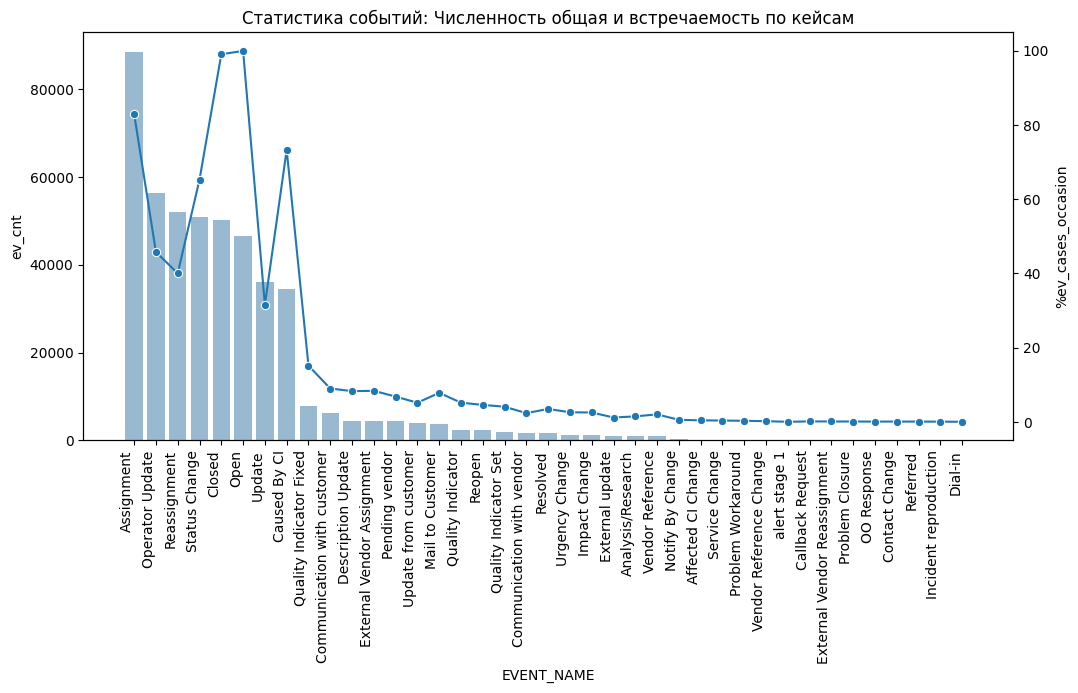

In [ ]:
# визуализируем полученную таблицу
ax1 = sns.set_style(style=None, rc=None )

fig, ax1 = plt.subplots(figsize=(12,6));
fig.autofmt_xdate(rotation=90);

sns.barplot(data = event_stat, x='EVENT_NAME', y='ev_cnt', alpha=0.5, ax=ax1);
ax2 = ax1.twinx()

sns.lineplot(data = event_stat['%ev_cases_occasion'], marker='o', sort = False, ax=ax2);

plt.title('Статистика событий: Численность общая и встречаемость по кейсам');